## 1. Computational graphs  
----------

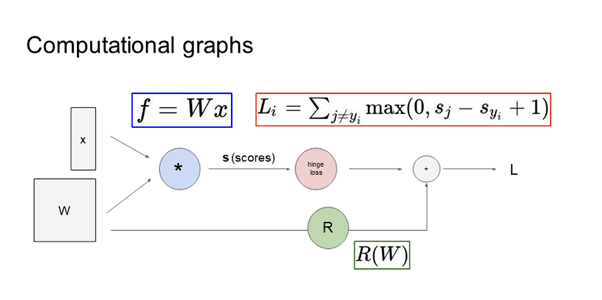

* computational graph는 함수 식을 단순화하여 graph로 표현하는 방법이다  
* 임의의 복잡한 함수에서 analytic gradient를 구할 때 computational graph를 이용한다  
* computational graph를 사용해서 함수를 표현한다  
* Backpropagation 사용 가능해진다  
* Gradient를 얻기 위해 computational graph 내부의 모든 변수에 대해 chain rule을 재귀적으로 사용한다  

## 2. Backpropagation  
----------

* Backpropagation의 첫번째 단계는 함수 f를 computational graph로 나타내는 것이다
* Backpropagation은 chain rule을 재귀적으로 사용한다
* chain rule에 의해 그래프의 뒤에서부터 시작한다

* 다음 예제를 보자  

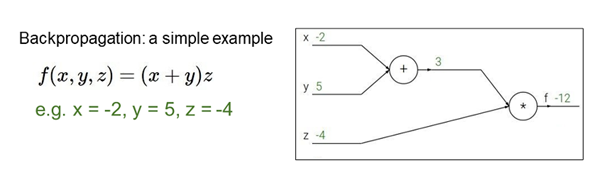

함수 f를 위와 같이 computational graph로 나타낸다  
여기서 우리가 원하는 것 x, y, z에 대한 함수 f의 gradient이다  
덧셈 노드를 q라고 하면, q=x+y, f=q*z  

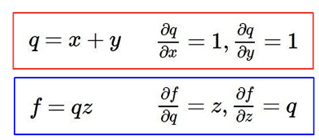

y에 대한 f의 미분값(gradient)을 구하려고 하는데, f와 y는 연결되어 있지 않다. -> 여기서 chain rule을 이용!  

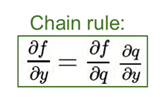

마찬가지 방법으로 x에 대한 f의 gradient도 구할 수 있다  

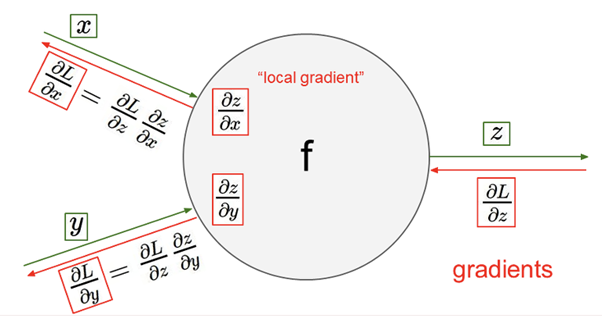

* 우리가 알고 있는 건 각 node와 node의 local inputs(여기선 x와 y)  
* local input을 받아서 local gradient를 구하고, 앞에서 넘어온 upstream gradient를 곱해서 gradient를 구할 수 있다  

### Patterns in backward flow  
##### Add gate: gradient distributor  
 - add는 local gradient가 1이다. [local gradient]*[upstream gradient]=[upstream gradient]가 그대로 나오게 된다. Add gate는 gradient를 그대로 전해주는 역할을 한다  

##### Max gate: gradient router
- max gate는 큰 값에 upstream gradient를 전달하고 작은 값은 0으로 만들어서 전달한다 

##### Mul gate: gradient switcher  
- 두개의 브랜치에서 local gradient 값이 서로 switch된다  

### Gradients for vectorized code
* 다변수의 벡터에 대해서 gradient는 Jacobian matrix로 구한다  
* 자코비안 행렬은 다변수 함수의 미분값을 행렬로 표현한 것이다  

## 3. Neural networks  
----------
* 지금까지는 linear function을 다뤄봤고, linear function과 비선형을 겹겹이 쌓으면 더 복잡한 문제를 해결할 수 있는 모델을 만들 수 있다  
* 이런 모델을 신경망 구조에서 아이디어를 얻어 복잡한 모델을 만들 수 있다  

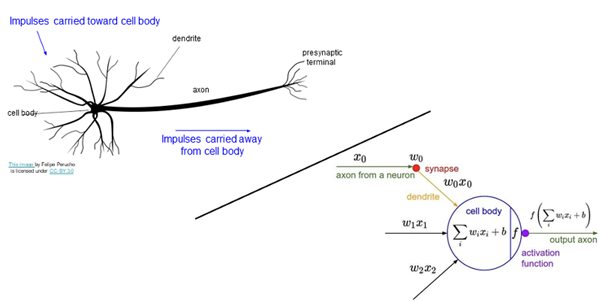

* 뉴런 구조를 이해할 때 주의할 점!  
  * 다양한 구조가 있다  
  * dendrites는 복잡한 비선형 계산을 수행할 수 있다  
  * 시냅스는 하나의 weight가 아니라 복잡한 비선형 시스템이다  
  * activation function을 통해 얻은 rate가 적절하지 않을 수 있다  
* 지금까지 activation function중 sigmoid를 봤는데, 실제로는 다양한 활성화 함수들이 있다  
* 보통 sigmoid function과 ReLU function을 많이 사용한다  
* Neural network의 architecture는 다음과 같다  

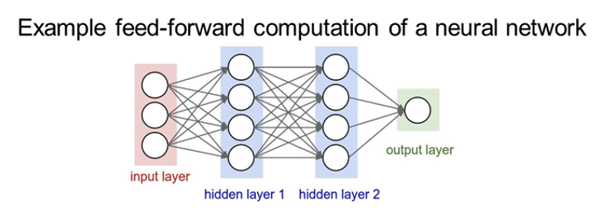

* ‘3-layer neural net’ 또는 ‘2-hidden-layer neural net’ 이라고 한다  
* 모든 layer들이 하나도 빠짐없이 다 연결되어 있는데 이를 Fully-connected layers라고 한다  